# **Análise de Gênero Gramatical no Falares Sergipanos**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import cohen_kappa_score

In [ ]:
df_falares = pd.read_csv("../data/Deslocamentos_2019_[substantivo][etiquetado].csv")
df_falares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6396 entries, 0 to 6395
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   contexto                 6395 non-null   object
 1   palavra                  6396 non-null   object
 2   classe                   6396 non-null   object
 3   genero                   6396 non-null   object
 4   correcao_classe          964 non-null    object
 5   correcao_palavra         427 non-null    object
 6   genero_derivacao         6395 non-null   object
 7   tipo_nome                6396 non-null   object
 8   correcao_genero          6396 non-null   object
 9   animacidade              6396 non-null   object
 10  marca_genero_raiz        6396 non-null   object
 11  marca_genero_desinencia  6396 non-null   object
 12  marca_genero_concord     6395 non-null   object
 13  forma_heteronimo         6394 non-null   object
 14  tipo_substantivo         6394 non-null  

## **Limpeza e organização dos dados**

In [ ]:
for coluna in df_falares.columns:
    #preenchimento de nulos
    df_falares[coluna] = df_falares[coluna].fillna('-')
    #transforma em texto
    df_falares[coluna] = df_falares[coluna].astype(str)
    #tudo minúsculo e remove espaços em branco
    df_falares[coluna] = df_falares[coluna].apply(lambda x: x.lower().strip())

    if coluna not in ['contexto', 'palavra', 'correcao_palavra']:
        display(coluna, df_falares[coluna].unique())

'classe'

array(['substantivo'], dtype=object)

'genero'

array(["['masc']", "['fem']", '[]'], dtype=object)

'correcao_classe'

array(['-', 'verbo', 'marcador discursivo', 'pronome', 'meses',
       'advérbio', 'numeral', 'adjetivo', 'locução adverbial', '?',
       'interjeição', 'conjunção', 'adjettivo', '', 'preposição',
       'prefixo', 'vocativo', 'nome próprio', 'nome composto', 'adverbio',
       'conectivo', 'onomatopeia', 'frase', 'acento', 'chamamento',
       'marcador discurivo', 'abreviatura', 'verbos',
       'marcador de ciscurso'], dtype=object)

'genero_derivacao'

array(['não', '-', 'sim'], dtype=object)

'tipo_nome'

array(['comum', '-', 'deverbal', 'impróprio', 'estrangeirismo',
       'nome próprio'], dtype=object)

'correcao_genero'

array(['masculino', '-', 'feminino', 'masculino e feminino'], dtype=object)

'animacidade'

array(['menos', '-', 'mais'], dtype=object)

'marca_genero_raiz'

array(['sim', '-', 'não'], dtype=object)

'marca_genero_desinencia'

array(['não', '-', 'sim'], dtype=object)

'marca_genero_concord'

array(['não', '-', 'sim'], dtype=object)

'forma_heteronimo'

array(['não', '-', 'sim'], dtype=object)

'tipo_substantivo'

array(['uniforme', '-', 'biforme'], dtype=object)

'qual_heteronimo'

array(['-', 'mãe', 'pai', 'moças', 'mulheres', 'homem', 'rapaz', 'moça',
       'homens', 'pais', 'mulher', 'égua', 'vaca', 'cadelas', 'zangão',
       'painho', 'padrinho', 'mãe / mainha', 'frade', 'madrinha', 'boi',
       'cabra', 'madre', 'bois', 'rainhas', 'girl', 'madrasta', 'mamãe',
       'cadela', 'papai'], dtype=object)

### **Correção das classificações**

In [ ]:
df_falares['genero'] = df_falares['genero'].replace("['masc']", 'masculino')
df_falares['genero'] = df_falares['genero'].replace("['fem']", 'feminino')
df_falares['genero'] = df_falares['genero'].replace('[]', '-')
df_falares['correcao_classe'] = df_falares['correcao_classe'].replace('verbos', 'verbo')
df_falares['correcao_classe'] = df_falares['correcao_classe'].replace(['marcador discurivo', 'marcador de ciscurso'], 'marcador discursivo')
df_falares['correcao_classe'] = df_falares['correcao_classe'].replace('adjettivo', 'adjetivo')
df_falares['correcao_classe'] = df_falares['correcao_classe'].replace('adverbio', 'advérbio')


## **Análise dos dados**

### **Classificações de gênero**

#### **Classificação automática - spaCy**

In [ ]:
#distribuição de gênero na classificação automática
df_falares['genero'].value_counts()

,count
genero,
masculino,3389
feminino,2997
-,10


#### **Classificação humana**

In [ ]:
#distribuição de gênero na classificação humana
df_falares['correcao_genero'].value_counts()

,count
correcao_genero,
feminino,2649
masculino,2485
-,1126
masculino e feminino,136


#### **Discordâncias**

In [ ]:
discordancias = df_falares[df_falares['genero'] != df_falares['correcao_genero']]
print(f'O número de discordâncias foi de {len(discordancias)}')

O número de discordâncias foi de 1414


In [ ]:
pd.crosstab(discordancias['genero'], discordancias['correcao_genero'])

correcao_genero,-,feminino,masculino,masculino e feminino
genero,,,,
-,0,3,0,4
feminino,381,0,48,26
masculino,742,104,0,106


#### **Concordância - Kappa de Cohen**

In [ ]:
concordancia_genero = round(cohen_kappa_score(df_falares['genero'], df_falares['correcao_genero']), 3)
print(f'A concordância entre as classificações de gênero foi de {concordancia_genero} (Kappa)')

A concordância entre as classificações de gênero foi de 0.631 (Kappa)


In [ ]:
df_falares_filtrado = df_falares[(df_falares['genero'] != '-') & (df_falares['correcao_genero'] != '-')]

concordancia_genero = round(cohen_kappa_score(df_falares_filtrado['genero'], df_falares_filtrado['correcao_genero']), 3)
print(f'A concordância entre as classificações de gênero após a filtragem foi de {concordancia_genero} (Kappa)')

A concordância entre as classificações de gênero após a filtragem foi de 0.895 (Kappa)


### **Distribuições**

### **Filtragem das classificações**
As classificações de gênero foram filtradas, removendo as não aplicáveis (com etiqueta '-').

In [ ]:
df_falares = df_falares[df_falares['correcao_genero'] != '-']

In [ ]:
def plot_distribuicao_ordenada(df, coluna, hue, titulo, x_label):
    df = df[df[coluna] != '-']

    order = df[coluna].value_counts().index
    tabela_percentual = pd.crosstab(df[coluna], df[hue], normalize='all')
    print(f"Tabela de Dados (Percentual do Total): {titulo}")
    display((tabela_percentual * 100).style.format('{:.1f}%'))

    plt.figure(figsize=(10, 6))

    ax = sns.countplot(data=df,
                       x=coluna,
                       hue=hue,
                       order=order,
                       stat='percent')

    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', padding=5, label_type='edge', fontsize=8)

    plt.title(titulo, fontsize=16)
    plt.ylabel('Percentual (%)', fontsize=12)
    plt.xlabel(x_label, fontsize=12)
    plt.xticks(rotation=30, ha='right')

    plt.ylim(0, plt.ylim()[1] * 1.15)

    plt.tight_layout()
    plt.savefig(f"../docs/plots/{titulo.replace(' ', '_')}.png")
    plt.show()

Tabela de Dados (Percentual do Total): Distribuição - Marcação de Gênero por Derivação


correcao_genero,feminino,masculino,masculino e feminino
genero_derivacao,,,
não,50.1%,47.0%,2.6%
sim,0.2%,0.2%,0.0%


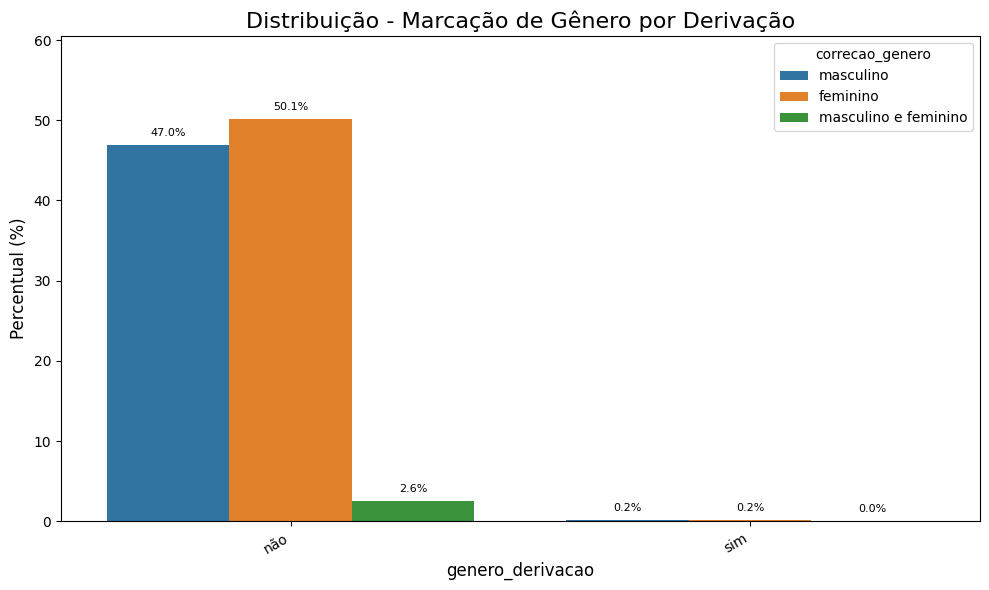

In [ ]:
plot_distribuicao_ordenada(df=df_falares,
                           coluna='genero_derivacao',
                           hue='correcao_genero',
                           titulo='Distribuição - Marcação de Gênero por Derivação',
                           x_label='genero_derivacao')

Tabela de Dados (Percentual do Total): Distribuição - Tipo de nome


correcao_genero,feminino,masculino,masculino e feminino
tipo_nome,,,
comum,36.4%,36.5%,1.8%
deverbal,12.8%,7.2%,0.5%
estrangeirismo,0.3%,1.8%,0.1%
impróprio,0.5%,1.2%,0.1%
nome próprio,0.4%,0.5%,0.1%


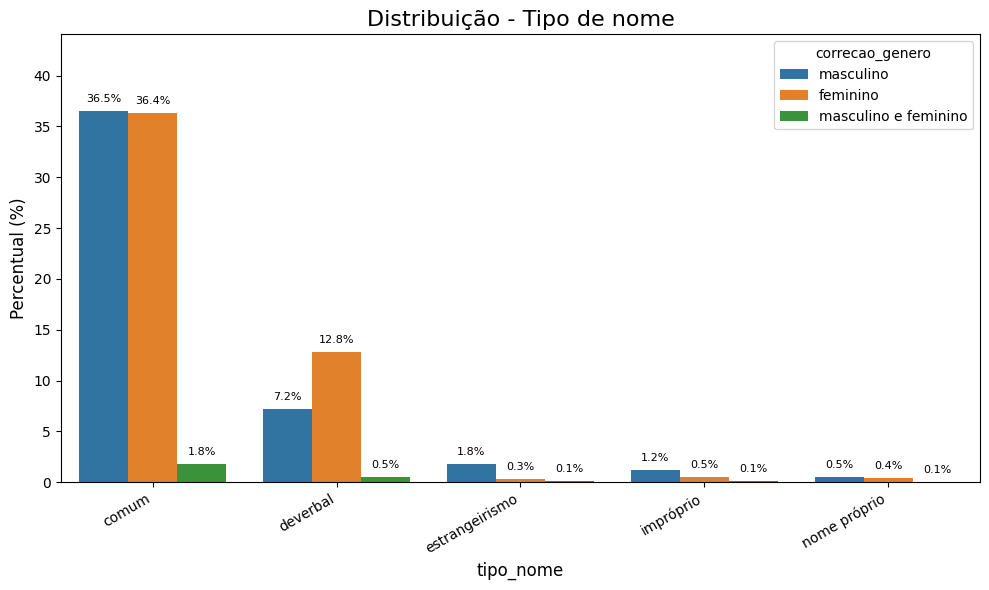

In [ ]:
plot_distribuicao_ordenada(df=df_falares,
                           coluna='tipo_nome',
                           hue='correcao_genero',
                           titulo='Distribuição - Tipo de nome',
                           x_label='tipo_nome')

Tabela de Dados (Percentual do Total): Distribuição - Animacidade


correcao_genero,feminino,masculino,masculino e feminino
animacidade,,,
mais,3.8%,8.8%,2.0%
menos,46.5%,38.3%,0.5%


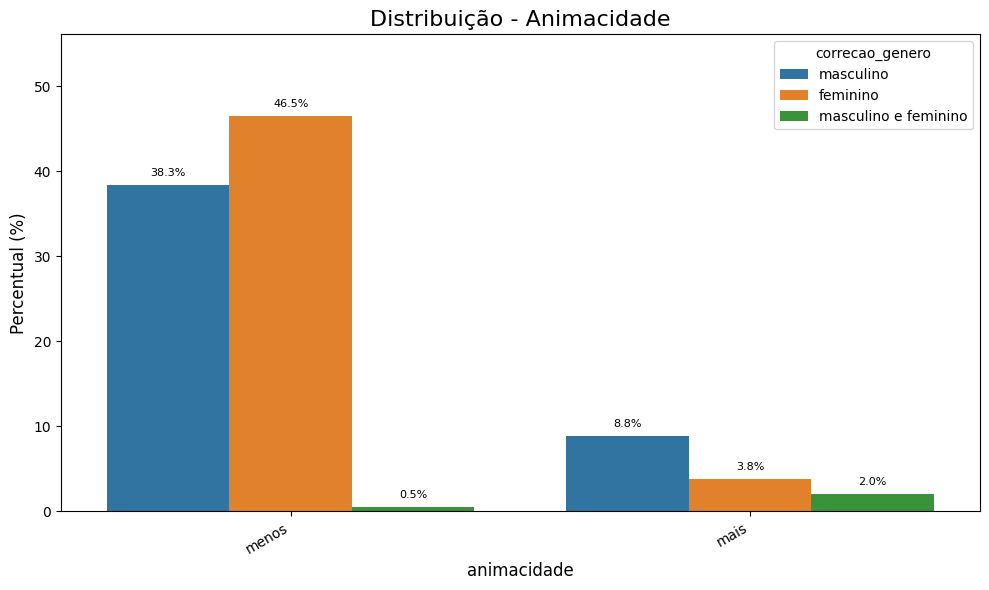

In [ ]:
plot_distribuicao_ordenada(df=df_falares,
                           coluna='animacidade',
                           hue='correcao_genero',
                           titulo='Distribuição - Animacidade',
                           x_label='animacidade')

Tabela de Dados (Percentual do Total): Distribuição - Marcação de gênero na raiz


correcao_genero,feminino,masculino,masculino e feminino
marca_genero_raiz,,,
não,3.2%,8.7%,2.0%
sim,47.1%,38.4%,0.5%


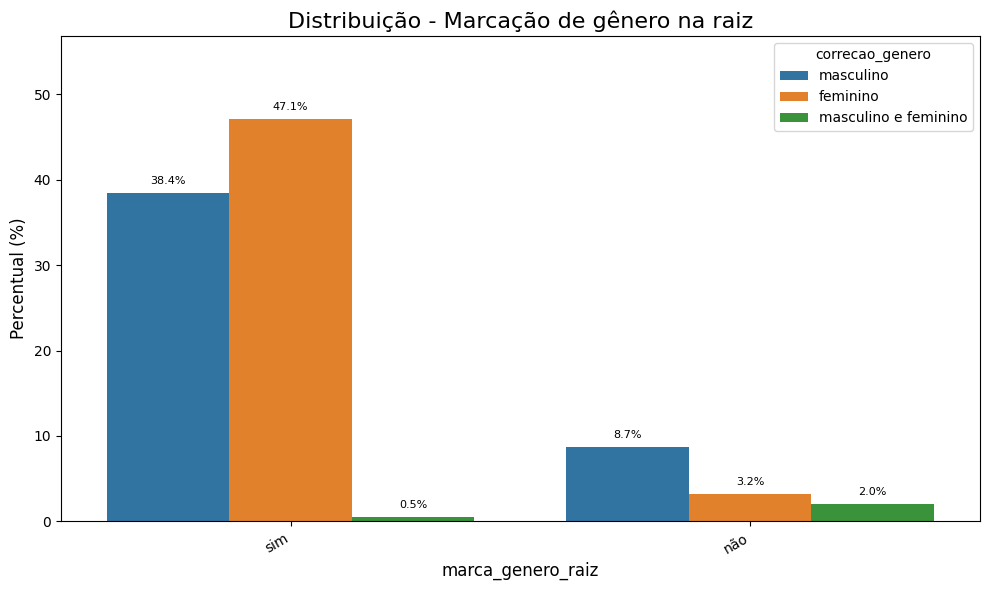

In [ ]:
plot_distribuicao_ordenada(df=df_falares,
                           coluna='marca_genero_raiz',
                           hue='correcao_genero',
                           titulo='Distribuição - Marcação de gênero na raiz',
                           x_label='marca_genero_raiz')

Tabela de Dados (Percentual do Total): Distribuição - Marcação de gênero por desinência


correcao_genero,feminino,masculino,masculino e feminino
marca_genero_desinencia,,,
não,47.6%,40.5%,2.5%
sim,2.6%,6.7%,0.1%


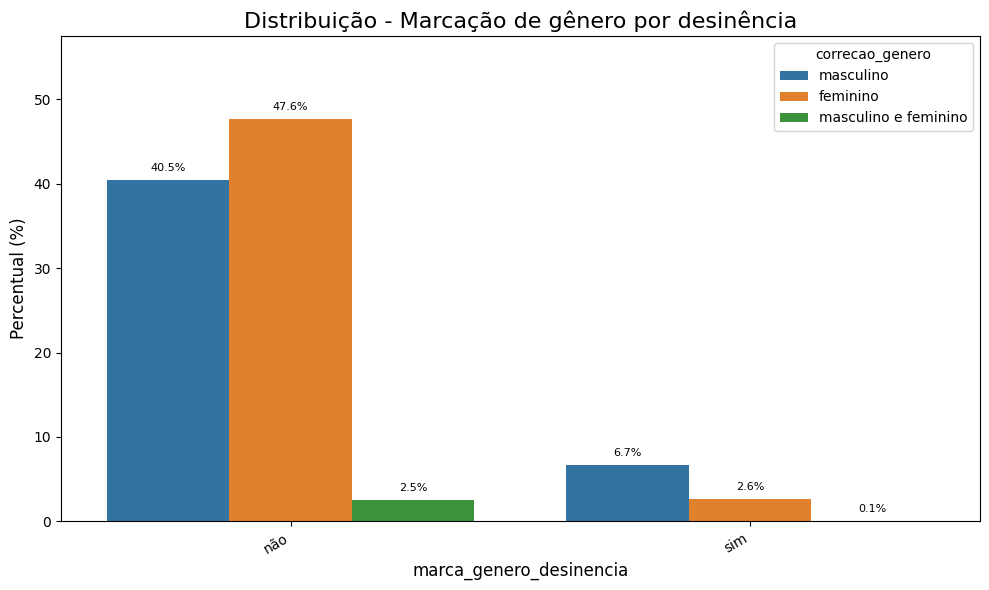

In [ ]:
plot_distribuicao_ordenada(df=df_falares,
                           coluna='marca_genero_desinencia',
                           hue='correcao_genero',
                           titulo='Distribuição - Marcação de gênero por desinência',
                           x_label='marca_genero_desinencia')

Tabela de Dados (Percentual do Total): Distribuição - Marcação de gênero por concordância


correcao_genero,feminino,masculino,masculino e feminino
marca_genero_concord,,,
não,49.6%,45.0%,0.4%
sim,0.7%,2.2%,2.2%


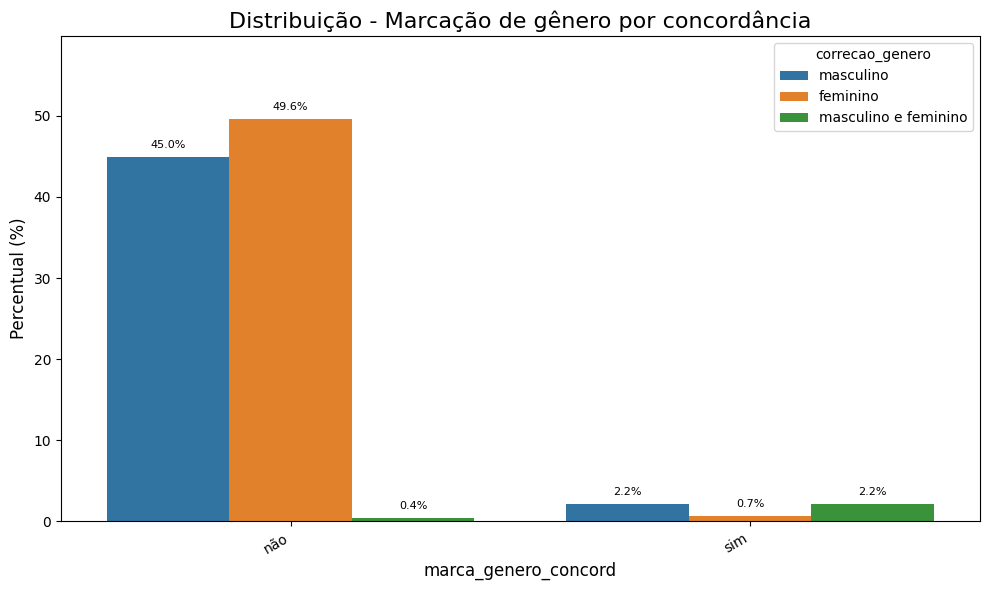

In [ ]:
plot_distribuicao_ordenada(df=df_falares,
                           coluna='marca_genero_concord',
                           hue='correcao_genero',
                           titulo='Distribuição - Marcação de gênero por concordância',
                           x_label='marca_genero_concord')


Tabela de Dados (Percentual do Total): Distribuição - Existência de heteronímia


correcao_genero,feminino,masculino,masculino e feminino
forma_heteronimo,,,
não,50.0%,46.6%,2.6%
sim,0.3%,0.6%,0.0%


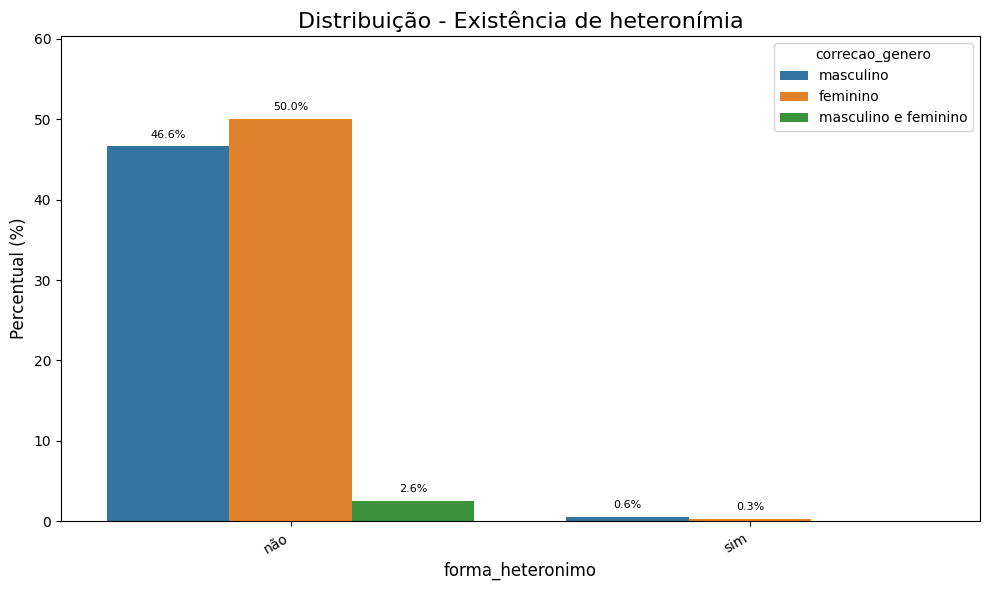

In [ ]:
plot_distribuicao_ordenada(df=df_falares,
                           coluna='forma_heteronimo',
                           hue='correcao_genero',
                           titulo='Distribuição - Existência de heteronímia',
                           x_label='forma_heteronimo')

Tabela de Dados (Percentual do Total): Distribuição - Biformes ou Uniformes


correcao_genero,feminino,masculino,masculino e feminino
tipo_substantivo,,,
biforme,1.7%,4.8%,0.0%
uniforme,48.6%,42.4%,2.6%


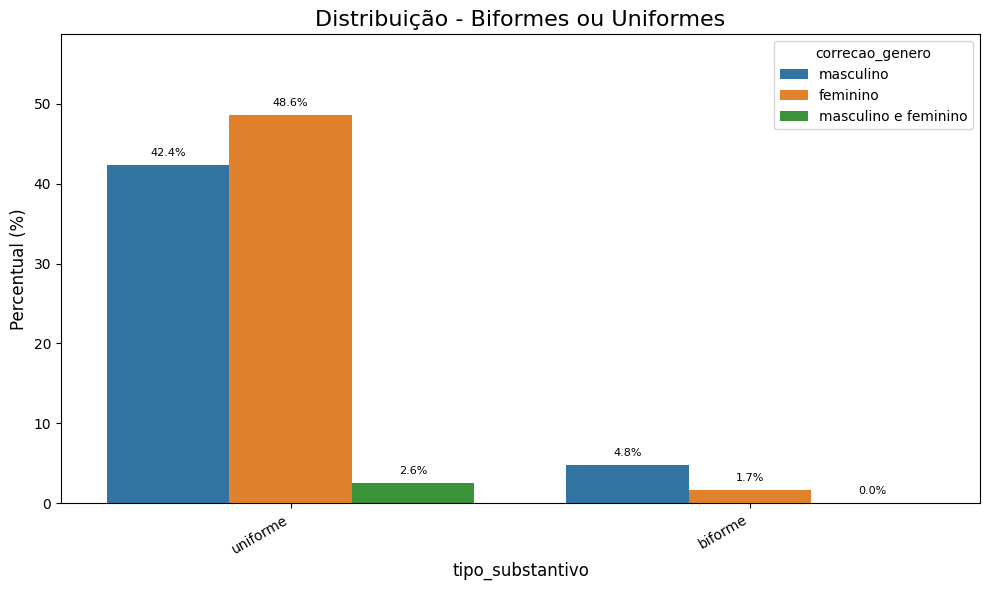

In [ ]:
plot_distribuicao_ordenada(df=df_falares,
                           coluna='tipo_substantivo',
                           hue='correcao_genero',
                           titulo='Distribuição - Biformes ou Uniformes',
                           x_label='tipo_substantivo')